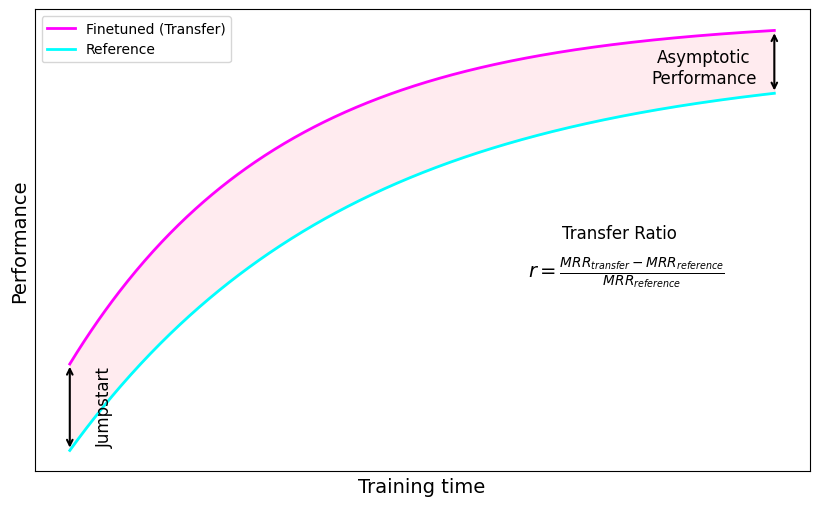

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
x = np.linspace(0, 10, 500)
transfer_performance = 0.2 + (1 - 0.2) * (1 - np.exp(-x / 3))
base_performance = 0.9 * (1 - np.exp(-x/4))  # Simulated performance curve for base model

# Calculate areas under the curves for transfer ratio formula visualization
auc_transfer = np.trapz(transfer_performance, x)
auc_base = np.trapz(base_performance, x)


# Plot without filling the base curve and removing the legend

plt.figure(figsize=(10, 6))
plt.plot(x, transfer_performance, label='Finetuned (Transfer)', color='magenta', linewidth=2)
plt.plot(x, base_performance, label='Reference', color='cyan', linewidth=2)

# Fill the area between the transfer and base curves
plt.fill_between(x, base_performance, transfer_performance, where=(transfer_performance > base_performance),
                 interpolate=True, color='pink', alpha=0.3)

# Add arrow for jumpstart
plt.annotate('', 
             xy=(0, transfer_performance[0]), xytext=(0, base_performance[0]),
             arrowprops=dict(arrowstyle="<->", color='black', linewidth=1.5))
plt.text(0.5, 0.1, 'Jumpstart', fontsize=12, ha='center', va='center', rotation=90)

# Add arrow for asymptotic performance
plt.annotate('', 
             xy=(10, transfer_performance[-1]), xytext=(10, base_performance[-1]),
             arrowprops=dict(arrowstyle="<->", color='black', linewidth=1.5))
plt.text(9, 0.85, 'Asymptotic\nPerformance', fontsize=12, ha='center')

# Add formula for transfer ratio with an arrow between text and shaded area
plt.text(7.8, 0.49, 'Transfer Ratio', fontsize=12, color='black', ha='center')
plt.annotate(r'$r = \frac{MRR_{transfer} - MRR_{reference}}{MRR_{reference}}$',
             xy=(5, 0.6), xycoords='data',
             xytext=(6.5, 0.4), textcoords='data',
             fontsize=14, color='black')

# Labels
plt.xlabel('Training time', fontsize=14)
plt.ylabel('Performance', fontsize=14)
plt.legend()
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig("transfer_learning_metrics.pdf", format='pdf',dpi=5000,bbox_inches='tight')

# Show the plot
plt.show()


